In [ ]:
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving Ireda_Stockdata.csv to Ireda_Stockdata.csv
Uploaded file: Ireda_Stockdata.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Ireda_Stockdata.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-11-29,50.000000,59.990002,49.990002,59.990002,59.990002,38154690.0
1,2023-11-30,64.550003,68.910004,60.610001,65.290001,65.290001,26443500.0
2,2023-12-01,67.290001,68.440002,62.299999,62.750000,62.750000,11314640.0
3,2023-12-04,64.800003,65.889999,63.119999,64.540001,64.540001,4928002.0
4,2023-12-05,65.000000,65.000000,62.880001,63.040001,63.040001,2491156.0
...,...,...,...,...,...,...,...
82,2024-04-01,138.149994,142.649994,137.949997,142.649994,142.649994,2743630.0
83,2024-04-02,146.050003,149.750000,146.050003,149.750000,149.750000,1970935.0
84,2024-04-03,149.000000,157.199997,147.100006,157.199997,157.199997,3797490.0
85,2024-04-04,164.500000,165.050003,154.649994,158.350006,158.350006,9079036.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-11-29,50.000000,59.990002,49.990002,59.990002,59.990002,38154690.0
1,2023-11-30,64.550003,68.910004,60.610001,65.290001,65.290001,26443500.0
2,2023-12-01,67.290001,68.440002,62.299999,62.750000,62.750000,11314640.0
3,2023-12-04,64.800003,65.889999,63.119999,64.540001,64.540001,4928002.0
4,2023-12-05,65.000000,65.000000,62.880001,63.040001,63.040001,2491156.0


In [ ]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-11-29')
datetime_object

datetime.datetime(2023, 11, 29, 0, 0)

In [ ]:
df = df[['Date' , 'Close']]
df

,Date,Close
0,2023-11-29,59.990002
1,2023-11-30,65.290001
2,2023-12-01,62.750000
3,2023-12-04,64.540001
4,2023-12-05,63.040001
...,...,...
82,2024-04-01,142.649994
83,2024-04-02,149.750000
84,2024-04-03,157.199997
85,2024-04-04,158.350006


In [ ]:
df.index = df.pop('Date')
df


,Close
Date,
2023-11-29,59.990002
2023-11-30,65.290001
2023-12-01,62.750000
2023-12-04,64.540001
2023-12-05,63.040001
...,...
2024-04-01,142.649994
2024-04-02,149.750000
2024-04-03,157.199997


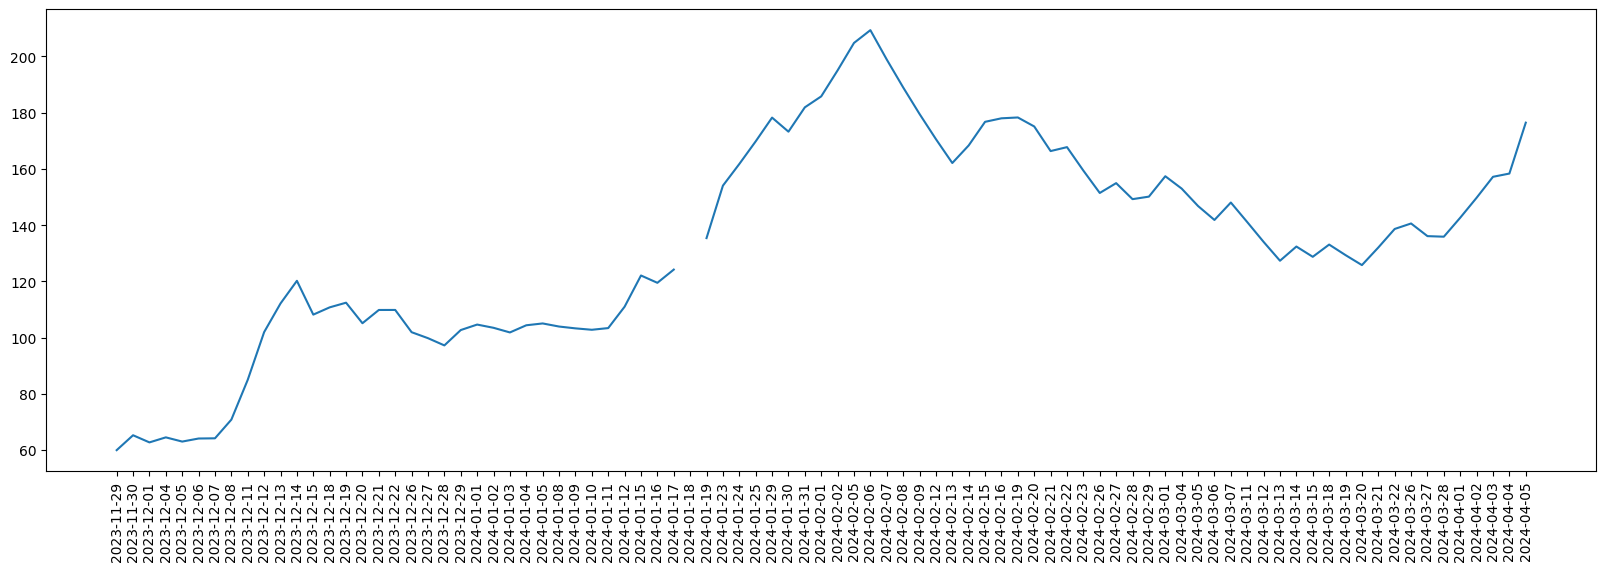

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)

plt.plot(df.index, df['Close'])

plt.show()

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

NameError: name 'df' is not defined